# Regression Modeling

### Import Libraries and Data

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score, mean_squared_error, r2_score
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.compose import make_column_transformer, make_column_selector, TransformedTargetRegressor
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, AdaBoostRegressor, GradientBoostingRegressor

In [2]:
df = pd.read_csv('../../01_data/cleaned_data/school_df_v6.csv')

In [3]:
df = df.iloc[:,:45]
df.dropna(how='all', inplace=True)

In [4]:
# drop 2 schools that have no attendance data
df.drop(df[df['code'] == 201].index, inplace = True)
df.drop(df[df['code'] == 347].index, inplace = True)
df = df.replace(-1,np.nan)
df.dropna(how='any',inplace=True)

In [5]:
df = df.replace(-1,np.nan)
df.dropna(how='any',inplace=True)

In [6]:
df.shape

(81, 45)

In [7]:
df.head(2)

,code,name,grade_band,enrollment_SY1718,enrollment_SY1819,star_score_SY1718,star_score_SY1819,star_rating_SY1718,star_rating_SY1819,capacity_SY1718,...,count_20+_SY1718,pct_20+_SY1718,budgeted_amount_FY16,budgeted_enrollment_FY16,budgeted_amount_FY17,budgeted_enrollment_FY17,pct_meet_exceed_math_SY1718,pct_meet_exceed_ela_SY1718,pct_meet_exceed_math_SY1819,pct_meet_exceed_ela_SY1819
0,175.0,School-Within-School @ Goding,Elementary,308.0,313.0,88.55,88.26,5.0,5.0,444.0,...,0.0,0.000000,1.059280e+07,5880.0,3815456.0,2674740.0,0.765,0.765,0.743,0.752
2,202.0,Aiton Elementary School,Elementary,243.0,244.0,43.85,10.79,3.0,1.0,529.0,...,12.0,0.049383,7.429920e+06,2650.0,3780814.0,2499672.0,0.129,0.171,0.153,0.056


In [8]:
df = df[df['star_rating_SY1718'] !=-1]

In [9]:
X=df[['enrollment_SY1718', 'enrollment_SY1819', 'capacity_SY1718', 
        'capacity_SY1819', 'latitude', 'longitude', 'cluster', 'ward','pct_0_SY1819', 
        'pct_1-5_SY1819', 'pct_6-10_SY1819', 'pct_11-20_SY1819', 'pct_20+_SY1819', 
        'pct_0_SY1718', 'pct_1-5_SY1718', 'pct_6-10__SY1718', 'pct_11-20_SY1718', 
        'pct_20+_SY1718', 'budgeted_amount_FY16', 'budgeted_enrollment_FY16', 
        'budgeted_amount_FY17', 'budgeted_enrollment_FY17', 'pct_meet_exceed_math_SY1718', 
        'pct_meet_exceed_ela_SY1718', 'pct_meet_exceed_math_SY1819', 'pct_meet_exceed_ela_SY1819']]

In [10]:
y = df['star_rating_SY1718']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=7)

In [12]:
sscaler = StandardScaler()
X_train_scaled = sscaler.fit_transform(X_train)
X_test_scaled = sscaler.fit_transform(X_test)

### Null Model

In [13]:
y.value_counts()

3.0    29
2.0    20
4.0    13
5.0    11
1.0     8
Name: star_rating_SY1718, dtype: int64

In [14]:
#null model will be 34.5%
y.value_counts(normalize=True)

3.0    0.358025
2.0    0.246914
4.0    0.160494
5.0    0.135802
1.0    0.098765
Name: star_rating_SY1718, dtype: float64

### Linear Regression

In [15]:
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
lr.score(X_test_scaled, y_test)

-460845212343844.56

### Ridge

In [16]:
ridge = Ridge()
ridge.fit(X_train_scaled, y_train)
ridge.score(X_test_scaled, y_test)

0.6817591357894337

In [17]:
pipe = make_pipeline(StandardScaler(), Ridge())
params = {'ridge__alpha': ['.01', '0.1', '1', '10', '100', '200', '500', '1000', '10_000'],
          'ridge__normalize': [True, False]}
ridge_grid = GridSearchCV(estimator=pipe, param_grid=params, n_jobs=-1)
ridge_grid.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('ridge', Ridge())]),
             n_jobs=-1,
             param_grid={'ridge__alpha': ['.01', '0.1', '1', '10', '100', '200',
                                          '500', '1000', '10_000'],
                         'ridge__normalize': [True, False]})

In [18]:
ridge_grid.best_params_

{'ridge__alpha': '1', 'ridge__normalize': True}

In [19]:
print(f' ridge (train set) score is  {ridge_grid.score(X_train, y_train)}')
print(f' ridge (test set) score is   {ridge_grid.score(X_test, y_test)}')
print(f' ridge (test set) mse is     {mean_squared_error(y_test, ridge_grid.predict(X_test), squared=False)}')
print(f' ridge explained var is      {explained_variance_score(y_test, ridge_grid.predict(X_test))}')

 ridge (train set) score is  0.7182374882199523
 ridge (test set) score is   0.7278814777927329
 ridge (test set) mse is     0.6618947425880253
 ridge explained var is      0.7440290733622903


### Lasso

In [20]:
lasso = Lasso()
lasso.fit(X_train_scaled, y_train)

Lasso()

In [21]:
print(f' lasso score is         {lasso.score(X_test, y_test)}')
print(f' lasso mse is           {mean_squared_error(y_test, lasso.predict(X_test), squared=False)}')

 lasso score is         -0.057690140845070514
 lasso mse is           1.3049356853336271


### Decision Tree Regressor

In [22]:
dtree = DecisionTreeRegressor()
dtree.fit(X_train_scaled, y_train)
dtree.score(X_test_scaled, y_test)

0.4380281690140845

In [23]:
dtree_pipe = make_pipeline(StandardScaler(), DecisionTreeRegressor())
params = {'decisiontreeregressor__min_samples_split': [1, 2, 3, 5, 7, 10, 15, 20, 30]}
dtree_grid = GridSearchCV(estimator=dtree_pipe, param_grid=params, n_jobs=-1)
dtree_grid.fit(X_train, y_train)

c:\programdata\miniconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [        nan -0.03694175  0.07499563  0.02377222  0.21888338  0.17889591
  0.25179859  0.48970377  0.52352962]
  warnings.warn(


GridSearchCV(estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('decisiontreeregressor',
                                        DecisionTreeRegressor())]),
             n_jobs=-1,
             param_grid={'decisiontreeregressor__min_samples_split': [1, 2, 3,
                                                                      5, 7, 10,
                                                                      15, 20,
                                                                      30]})

In [24]:
print(f' decision tree score is    {dtree_grid.score(X_test, y_test)}')
print(f' decision tree mse is      {mean_squared_error(y_test, dtree_grid.predict(X_test), squared=False)}')

 decision tree score is    0.49232914059781996
 decision tree mse is      0.9040677916100314


### KNN Regressor

In [25]:
knn = KNeighborsRegressor()
knn.fit(X_train_scaled, y_train)
knn.score(X_test_scaled, y_test)

0.620225352112676

In [26]:
knn_pipe = make_pipeline(StandardScaler(), KNeighborsRegressor())
params = {'kneighborsregressor__n_neighbors': [1, 2, 3, 5, 7, 10, 15, 20, 30],
         'kneighborsregressor__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}
knn_grid = GridSearchCV(estimator=knn_pipe, param_grid=params, n_jobs=-1)
knn_grid.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('kneighborsregressor',
                                        KNeighborsRegressor())]),
             n_jobs=-1,
             param_grid={'kneighborsregressor__algorithm': ['auto', 'ball_tree',
                                                            'kd_tree',
                                                            'brute'],
                         'kneighborsregressor__n_neighbors': [1, 2, 3, 5, 7, 10,
                                                              15, 20, 30]})

In [27]:
print(f' knn score is    {knn_grid.score(X_test, y_test)}')
print(f' knn mse is      {mean_squared_error(y_test, knn_grid.predict(X_test), squared=False)}')

 knn score is    0.6909456740442657
 knn mse is      0.7053867426838487


### Random Forest Regressor

In [28]:
rforest = RandomForestRegressor()
rforest.fit(X_train_scaled, y_train)
rforest.score(X_test_scaled, y_test)

0.5937978873239436

In [29]:
rforest_pipe = make_pipeline(StandardScaler(), RandomForestRegressor())
params = {'randomforestregressor__n_estimators': [50, 100, 200, 500],
         'randomforestregressor__criterion': ["mse", "mae"],
#          'randomforestregressor__max_depth': ["None", 2, 5, 10, 30],
         'randomforestregressor__min_samples_split': [2, 5, 10, 15],
         'randomforestregressor__ccp_alpha': [0.0, 0.0001, 0.01, 0.1, 1, 10],}
rforest_grid = GridSearchCV(estimator=rforest_pipe, param_grid=params, n_jobs=-1)
rforest_grid.fit(X_train, y_train)
rforest_grid.score(X_test, y_test)

0.6468283287157195

In [30]:
rforest_grid.best_params_

{'randomforestregressor__ccp_alpha': 0.1,
 'randomforestregressor__criterion': 'mse',
 'randomforestregressor__min_samples_split': 10,
 'randomforestregressor__n_estimators': 50}

In [32]:
print(f' random forest (test) score is     {rforest_grid.score(X_test, y_test)}')
print(f' random forest mse is              {mean_squared_error(y_test, rforest_grid.predict(X_test), squared=False)}')

 random forest (test) score is     0.6468283287157195
 random forest mse is              0.7540546282198467


### Elastic Net

In [33]:
enet_pipe = make_pipeline(StandardScaler(), ElasticNet())
enet_pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('elasticnet', ElasticNet())])

In [34]:
print(f' enet score is    {enet_pipe.score(X_test, y_test)}')
print(f' enet mse is      {mean_squared_error(y_test, enet_pipe.predict(X_test), squared=False)}')

 enet score is    0.38567383419938306
 enet mse is      0.9945105311862962


### Bagging Regressor

In [35]:
bag = BaggingRegressor()
bag.fit(X_train_scaled, y_train)

BaggingRegressor()

In [36]:
print(f' bagging regressor score is    {bag.score(X_test, y_test)}')
print(f' bagging regressor mse is      {mean_squared_error(y_test, bag.predict(X_test), squared=False)}')

 bagging regressor score is    -0.19374647887323992
 bagging regressor mse is      1.3863277974219381


### Adaboost

In [37]:
ada = AdaBoostRegressor()
ada.fit(X_train_scaled, y_train)
ada.score(X_test_scaled, y_test)

0.5828791080154361

In [38]:
ada_pipe = make_pipeline(StandardScaler(), AdaBoostRegressor())
params = {'adaboostregressor__n_estimators': [50, 100, 200, 300, 500, 1000],
         'adaboostregressor__loss': ['linear', 'square', 'exponential']}
ada_grid = GridSearchCV(estimator=ada_pipe, param_grid=params, n_jobs=-1)
ada_grid.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('adaboostregressor',
                                        AdaBoostRegressor())]),
             n_jobs=-1,
             param_grid={'adaboostregressor__loss': ['linear', 'square',
                                                     'exponential'],
                         'adaboostregressor__n_estimators': [50, 100, 200, 300,
                                                             500, 1000]})

In [39]:
print(f' Adaboost score is    {ada_grid.score(X_test, y_test)}')
print(f' Adaboost mse is      {mean_squared_error(y_test, ada_grid.predict(X_test), squared=False)}')

 Adaboost score is    0.527394158242883
 Adaboost mse is      0.872287044809909


### Gradient Boosting Regressor

In [40]:
gboost = GradientBoostingRegressor()
gboost.fit(X_train_scaled, y_train)
gboost.score(X_test_scaled, y_test)

0.567333243265687

In [41]:
gboost_pipe = make_pipeline(StandardScaler(), GradientBoostingRegressor())
params = {'gradientboostingregressor__n_estimators': [50, 100, 200, 300, 500, 1000]}
gboost_grid = GridSearchCV(estimator=gboost_pipe, param_grid=params, n_jobs=-1)
gboost_grid.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('gradientboostingregressor',
                                        GradientBoostingRegressor())]),
             n_jobs=-1,
             param_grid={'gradientboostingregressor__n_estimators': [50, 100,
                                                                     200, 300,
                                                                     500,
                                                                     1000]})

In [42]:
print(f' gradient boost score is    {gboost_grid.score(X_test, y_test)}')
print(f' gradient boost mse is      {mean_squared_error(y_test, gboost_grid.predict(X_test), squared=False)}')

 gradient boost score is    0.5548485338173663
 gradient boost mse is      0.84657177274965


### Support Vector

In [43]:
svr = SVR(C=3)
svr.fit(X_train_scaled, y_train)

SVR(C=3)

In [44]:
print(f' svr score is    {svr.score(X_test, y_test)}')
print(f' svr mse is      {mean_squared_error(y_test, svr.predict(X_test), squared=False)}')

 svr score is    -0.31474952042715776
 svr mse is      1.4548941250047813


# Feature Importance & Model Evaluation

In [45]:
# Random Forest Feature Importance - Top Features
feat_imp = pd.DataFrame(rforest.feature_importances_, index=X.columns)
feat_imp.sort_values(by=0, ascending=False).head(5)
# Top 5 Features:
# pct_meet_exceed_math_SY1819
# pct_meet_exceed_ela_SY1718
# pct_meet_exceed_math_SY1718
# pct_meet_exceed_ela_SY1819
# pct_11-20_SY1819

,0
pct_meet_exceed_math_SY1819,0.486937
pct_meet_exceed_math_SY1718,0.116034
pct_meet_exceed_ela_SY1819,0.089548
cluster,0.037636
pct_20+_SY1718,0.036381


In [46]:
# Random Forest Feature Importance - Bottom Features
feat_imp = pd.DataFrame(rforest.feature_importances_, index=X.columns)
feat_imp.sort_values(by=0, ascending=True).head(5)

# Bottom 5 Features:
# ward
# pct_0_SY1819
# budgeted_enrollment_FY17
# pct_11-20_SY1718
# enrollment_SY1718

,0
enrollment_SY1718,0.001814
budgeted_amount_FY16,0.003248
enrollment_SY1819,0.003870
capacity_SY1718,0.004255
budgeted_enrollment_FY16,0.004497


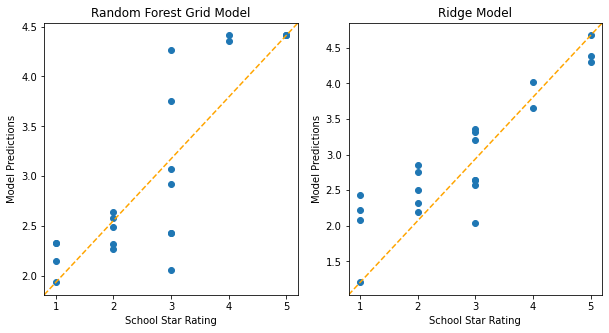

In [47]:
fig = plt.figure(figsize=(10, 5))

ax = fig.add_subplot(1, 2, 1)
y_pred_forest = rforest_grid.predict(X_test)
plt.scatter(y_test, y_pred_forest)
ax.plot([0,1], [0,1], transform=ax.transAxes, ls="--", c="orange")
plt.title('Random Forest Grid Model')
plt.xlabel('School Star Rating')
plt.ylabel('Model Predictions')

ax = fig.add_subplot(1, 2, 2)
y_pred_ridge = ridge_grid.predict(X_test)
plt.scatter(y_test, y_pred_ridge)
ax.plot([0,1], [0,1], transform=ax.transAxes, ls="--", c="orange")
plt.title('Ridge Model')
plt.xlabel('School Star Rating')
plt.ylabel('Model Predictions');

In [48]:
print(f' ridge (train set) score is        {ridge_grid.score(X_train, y_train)}')
print(f' ridge (test set) score is         {ridge_grid.score(X_test, y_test)}')
print(f' ridge (test set) mse is           {mean_squared_error(y_test, ridge_grid.predict(X_test), squared=False)}')
print()
print(f' lasso (train set) score is        {lasso.score(X_train_scaled, y_train)}')
print(f' lasso (test set) score is         {lasso.score(X_test_scaled, y_test)}')
print(f' lasso (test set) mse is           {mean_squared_error(y_test, lasso.predict(X_test), squared=False)}')
print()
print(f' dtree_grid (train set) score is   {dtree_grid.score(X_train, y_train)}')
print(f' dtree_grid (test set) score is    {dtree_grid.score(X_test, y_test)}')
print(f' dtree_grid (test set) mse is      {mean_squared_error(y_test, dtree_grid.predict(X_test), squared=False)}')
print()
print(f' knn_grid (train set) score is     {knn_grid.score(X_train, y_train)}')
print(f' knn_grid (test set) score is      {knn_grid.score(X_test, y_test)}')
print(f' knn_grid (test set) mse is        {mean_squared_error(y_test, knn_grid.predict(X_test), squared=False)}')
print()
print(f' rforest_grid (train set) score is {rforest_grid.score(X_train, y_train)}')
print(f' rforest_grid (test set) score is  {rforest_grid.score(X_test, y_test)}')
print(f' rforest_grid (test set) mse is    {mean_squared_error(y_test, rforest_grid.predict(X_test), squared=False)}')
print()
print(f' enet_pipe (train set) score is    {enet_pipe.score(X_train, y_train)}')
print(f' enet_pipe (test set) score is     {enet_pipe.score(X_test, y_test)}')
print(f' enet_pipe (test set) mse is       {mean_squared_error(y_test, enet_pipe.predict(X_test), squared=False)}')
print()
print(f' bag (train set) score is          {bag.score(X_train, y_train)}')
print(f' bag (test set) score is           {bag.score(X_test, y_test)}')
print(f' bag (test set) mse is             {mean_squared_error(y_test, bag.predict(X_test), squared=False)}')
print()
print(f' ada_grid (train set) score is     {ada_grid.score(X_train, y_train)}')
print(f' ada_grid (test set) score is      {ada_grid.score(X_test, y_test)}')
print(f' ada_grid (test set) mse is        {mean_squared_error(y_test, ada_grid.predict(X_test), squared=False)}')
print()
print(f' gboost (train set) score is       {gboost_grid.score(X_train, y_train)}')
print(f' gboost (test set) score is        {gboost_grid.score(X_test, y_test)}')
print(f' gboost (test set) mse is          {mean_squared_error(y_test, gboost_grid.predict(X_test), squared=False)}')
print()
print(f' svr (train set) score is          {svr.score(X_train, y_train)}')
print(f' svr (test set) score is           {svr.score(X_test, y_test)}')
print(f' svr (test set) mse is             {mean_squared_error(y_test, svr.predict(X_test), squared=False)}')

 ridge (train set) score is        0.7182374882199523
 ridge (test set) score is         0.7278814777927329
 ridge (test set) mse is           0.6618947425880253

 lasso (train set) score is        0.0
 lasso (test set) score is         -0.057690140845070514
 lasso (test set) mse is           1.3049356853336271

 dtree_grid (train set) score is   0.7373866140521703
 dtree_grid (test set) score is    0.49232914059781996
 dtree_grid (test set) mse is      0.9040677916100314

 knn_grid (train set) score is     0.679761597224785
 knn_grid (test set) score is      0.6909456740442657
 knn_grid (test set) mse is        0.7053867426838487

 rforest_grid (train set) score is 0.8042615783844606
 rforest_grid (test set) score is  0.6468283287157195
 rforest_grid (test set) mse is    0.7540546282198467

 enet_pipe (train set) score is    0.4292955613914825
 enet_pipe (test set) score is     0.38567383419938306
 enet_pipe (test set) mse is       0.9945105311862962

 bag (train set) score is        

In [49]:
# Models that performed well:
# - Ridge Model
# - Decision Trees
# - KNN
# - Random Forest Model
# - Neural Network

In [50]:
# Models that did not performed well:
# - Lasso Model
# - Elastic Net Modelnet_pipe
# - Bagging Regressor
# - Adaboost & Gradientboost
# - SVR